In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/Users/twff/Downloads/NYPD.csv')

/Users/twff/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data = data.rename(columns={'X_COORD_CD':'X_COORDINATE', 'Y_COORD_CD':'Y_COORDINATE'})

In [6]:
data.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORDINATE,Y_COORDINATE,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [8]:
data = data.dropna(subset=['X_COORDINATE','Y_COORDINATE'],how='any')

In [5]:
data['X_COORDINATE'] = data['X_COORDINATE'].astype(int)

In [6]:
data['Y_COORDINATE'] = data['Y_COORDINATE'].astype(int)

In [7]:
dfg = data['CMPLNT_NUM'].groupby([data['X_COORDINATE'],data['Y_COORDINATE']]).count()

In [8]:
sum(dfg)/len(dfg)

1.5333333333333334

In [10]:
join = pd.read_csv('/Users/twff/Downloads/DSNY_Graffiti_Information.csv')

In [11]:
join = join.dropna(subset=['X_COORDINATE','Y_COORDINATE'],how='any')

In [84]:
join.to_csv('/Users/twff/Downloads/big data/project/ds1004-project/graffiti.csv')

In [79]:
join.loc[join['X_COORDINATE'] == 1006778.0]

,INCIDENT_ADDRESS,BOROUGH,COMMUNITY_BOARD,POLICE_PRECINCT,CITY_COUNCIL_DISTRICT,BBL,CREATED_DATE,STATUS,RESOLUTION_ACTION,CLOSED_DATE,X_COORDINATE,Y_COORDINATE
5426,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016,1006778.0,210039.0


In [12]:
joined = pd.merge(data,join,how='inner',on = ['X_COORDINATE','Y_COORDINATE'])

In [13]:
joined.shape

(523, 34)

In [14]:
joined.head(10)
#joined['X_COORDINATE'][:10]

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,INCIDENT_ADDRESS,BOROUGH,COMMUNITY_BOARD,POLICE_PRECINCT,CITY_COUNCIL_DISTRICT,BBL,CREATED_DATE,STATUS,RESOLUTION_ACTION,CLOSED_DATE
0,544335825,12/25/2015,04:40:00,12/25/2015,04:48:00,12/25/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
1,992035083,12/19/2015,14:50:00,12/19/2015,14:55:00,12/19/2015,105,ROBBERY,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
2,624995070,10/23/2015,04:00:00,10/23/2015,04:30:00,11/03/2015,109,GRAND LARCENY,408.0,"LARCENY,GRAND FROM PERSON,LUSH WORKER(SLEEPING...",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
3,140699923,10/20/2015,14:00:00,NaN,NaN,10/23/2015,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
4,865966030,10/16/2015,18:25:00,10/16/2015,18:27:00,10/16/2015,351,CRIMINAL MISCHIEF & RELATED OF,258.0,"CRIMINAL MISCHIEF 4TH, GRAFFIT",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
5,460734741,09/26/2015,16:00:00,09/26/2015,16:05:00,09/26/2015,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
6,971722038,08/31/2015,21:15:00,08/31/2015,21:20:00,08/31/2015,348,VEHICLE AND TRAFFIC LAWS,916.0,LEAVING SCENE-ACCIDENT-PERSONA,...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
7,178124084,02/09/2015,22:30:00,02/10/2015,00:01:00,06/30/2015,341,PETIT LARCENY,339.0,"LARCENY,PETIT FROM OPEN AREAS,",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
8,438877606,06/03/2015,03:50:00,06/03/2015,03:55:00,06/03/2015,110,GRAND LARCENY OF MOTOR VEHICLE,441.0,"LARCENY,GRAND OF AUTO",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016
9,193922700,04/08/2015,14:05:00,04/08/2015,14:10:00,04/08/2015,578,HARRASSMENT 2,637.0,"HARASSMENT,SUBD 1,CIVILIAN",...,46 STREET & QUEENS BOULEVARD,QUEENS,02 QUEENS,Precinct 108,26.0,NaN,12/12/2016,Closed,10-90X - Unfounded,12/13/2016


In [19]:
ddg = joined['CMPLNT_NUM'].groupby([joined['X_COORDINATE'],joined['Y_COORDINATE']]).count()

In [20]:
ddg.index

MultiIndex(levels=[[987351.0, 990937.0, 995795.0, 996686.0, 996957.0, 997348.0, 997741.0, 998284.0, 999215.0, 1000556.0, 1006778.0, 1007529.0, 1007685.0, 1008913.0, 1009891.0, 1010401.0, 1012793.0, 1019158.0, 1037129.0, 1042835.0], [152602.0, 176387.0, 177700.0, 183798.0, 186939.0, 194388.0, 195041.0, 199678.0, 201128.0, 210039.0, 212698.0, 217850.0, 218469.0, 222590.0, 223194.0, 225841.0, 235720.0, 247976.0, 255617.0, 255874.0]],
           labels=[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], [8, 15, 11, 14, 12, 7, 16, 1, 2, 4, 9, 19, 6, 3, 17, 13, 18, 10, 0, 5]],
           names=['X_COORDINATE', 'Y_COORDINATE'])

In [78]:
ddg

X_COORDINATE  Y_COORDINATE
987351.0      201128.0          1
990937.0      225841.0          1
995795.0      217850.0         41
996686.0      223194.0          1
996957.0      218469.0          1
997348.0      199678.0         50
997741.0      235720.0          1
998284.0      176387.0          1
999215.0      177700.0         14
1000556.0     186939.0          1
1006778.0     210039.0        273
1007529.0     255874.0          1
1007685.0     195041.0          1
1008913.0     183798.0          1
1009891.0     247976.0          1
1010401.0     222590.0          7
1012793.0     255617.0          2
1019158.0     212698.0         24
1037129.0     152602.0         39
1042835.0     194388.0         62
Name: CMPLNT_NUM, dtype: int64

In [71]:
dd = pd.DataFrame()
dd['count'] = ddg 

In [72]:
dd['Num'] = range(20)

In [80]:
sum(ddg)/len(ddg)

26.149999999999999

In [74]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

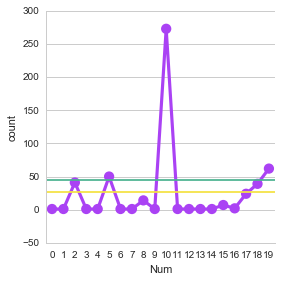

In [77]:
sns.set_style("whitegrid")
# Plot

sns.factorplot(x='Num',y='count',data=dd,color="#aa42f4")
sns.set_color_codes("pastel")
plt.axhline(y=45.33, xmin=0, xmax=1, hold=None,c="#4CB391")
plt.axhline(y=26.15, xmin=0, xmax=1, hold=None,c='#f4e242')

45.33 = mean

In [81]:
joined['CMPLNT_NUM'].groupby(joined['OFNS_DESC']).count()

OFNS_DESC
ASSAULT 3 & RELATED OFFENSES       57
BURGLAR'S TOOLS                     2
BURGLARY                            3
CRIMINAL MISCHIEF & RELATED OF     49
DANGEROUS DRUGS                    20
DANGEROUS WEAPONS                   9
FELONY ASSAULT                     16
FORGERY                            20
FRAUDS                              4
FRAUDULENT ACCOSTING                1
GRAND LARCENY                      69
GRAND LARCENY OF MOTOR VEHICLE     13
HARRASSMENT 2                      60
INTOXICATED & IMPAIRED DRIVING     13
KIDNAPPING & RELATED OFFENSES       1
MISCELLANEOUS PENAL LAW            10
MURDER & NON-NEGL. MANSLAUGHTER     1
NYS LAWS-UNCLASSIFIED FELONY        2
OFF. AGNST PUB ORD SENSBLTY &       4
OFFENSES AGAINST PUBLIC ADMINI     13
OFFENSES INVOLVING FRAUD            2
OTHER OFFENSES RELATED TO THEF      3
PETIT LARCENY                      95
POSSESSION OF STOLEN PROPERTY       3
ROBBERY                            39
UNAUTHORIZED USE OF A VEHICLE       2
VE

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

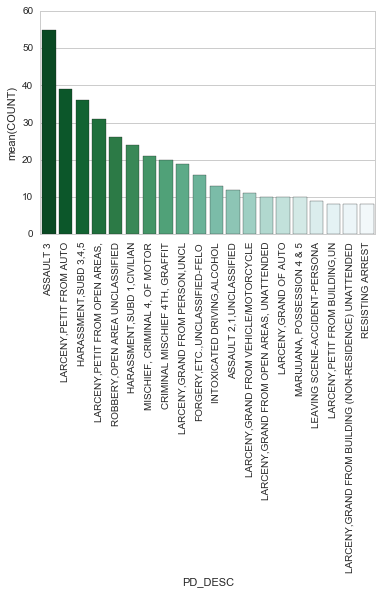

In [82]:
dfg = joined['CMPLNT_FR_DT'].groupby(joined['PD_DESC']).count()
output = pd.DataFrame()
output['PD_DESC'] = dfg.index
output['COUNT'] = dfg.values
output = output.sort_values(['COUNT'],ascending=False).head(20)
#sns.set_color_codes("muted")
sns.barplot(x='PD_DESC',y = 'COUNT', data=output, palette="BuGn_r")
plt.xticks(rotation=90)